In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_csv("StudentsPerformance.csv")

In [4]:
df


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72,74
1,female,group C,some college,standard,completed,69.0,90,88
2,female,group B,master's degree,standard,none,90.0,95,93
3,male,group A,associate's degree,free/reduced,none,47.0,57,44
4,male,group C,some college,standard,none,76.0,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99,95
996,male,group C,high school,free/reduced,none,62.0,55,55
997,female,group C,high school,free/reduced,completed,59.0,71,65
998,female,group D,some college,standard,completed,68.0,78,77


In [5]:
df.describe()

,math score,reading score,writing score
count,998.000000,1000.000000,1000.000000
mean,66.089178,69.169000,68.054000
std,15.177686,14.600192,15.195657
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,57.750000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   998 non-null    float64
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 62.6+ KB


In [7]:
print("Null Values Count")
df.isna().sum()

Null Values Count


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     2
reading score                  0
writing score                  0
dtype: int64

In [8]:
#To create a series true for NaN values for specific columns. for examplemath score in dataset and display data with only math score as NaN

series=pd.isnull(df['math score'])
df[series]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
15,female,group C,some high school,standard,none,NaN,75,78
31,female,group B,some college,standard,none,NaN,65,61


In [9]:
print("Duplicate Rows : ", df.duplicated().sum())

Duplicate Rows :  0


In [10]:
df.nunique()#returns unique value for each column

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [11]:
df['average score'] = (df['math score']+df['reading score']+df['writing score']) / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72.0,72,74,72.666667
1,female,group C,some college,standard,completed,69.0,90,88,82.333333
2,female,group B,master's degree,standard,none,90.0,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47.0,57,44,49.333333
4,male,group C,some college,standard,none,76.0,78,75,76.333333


<Axes: >

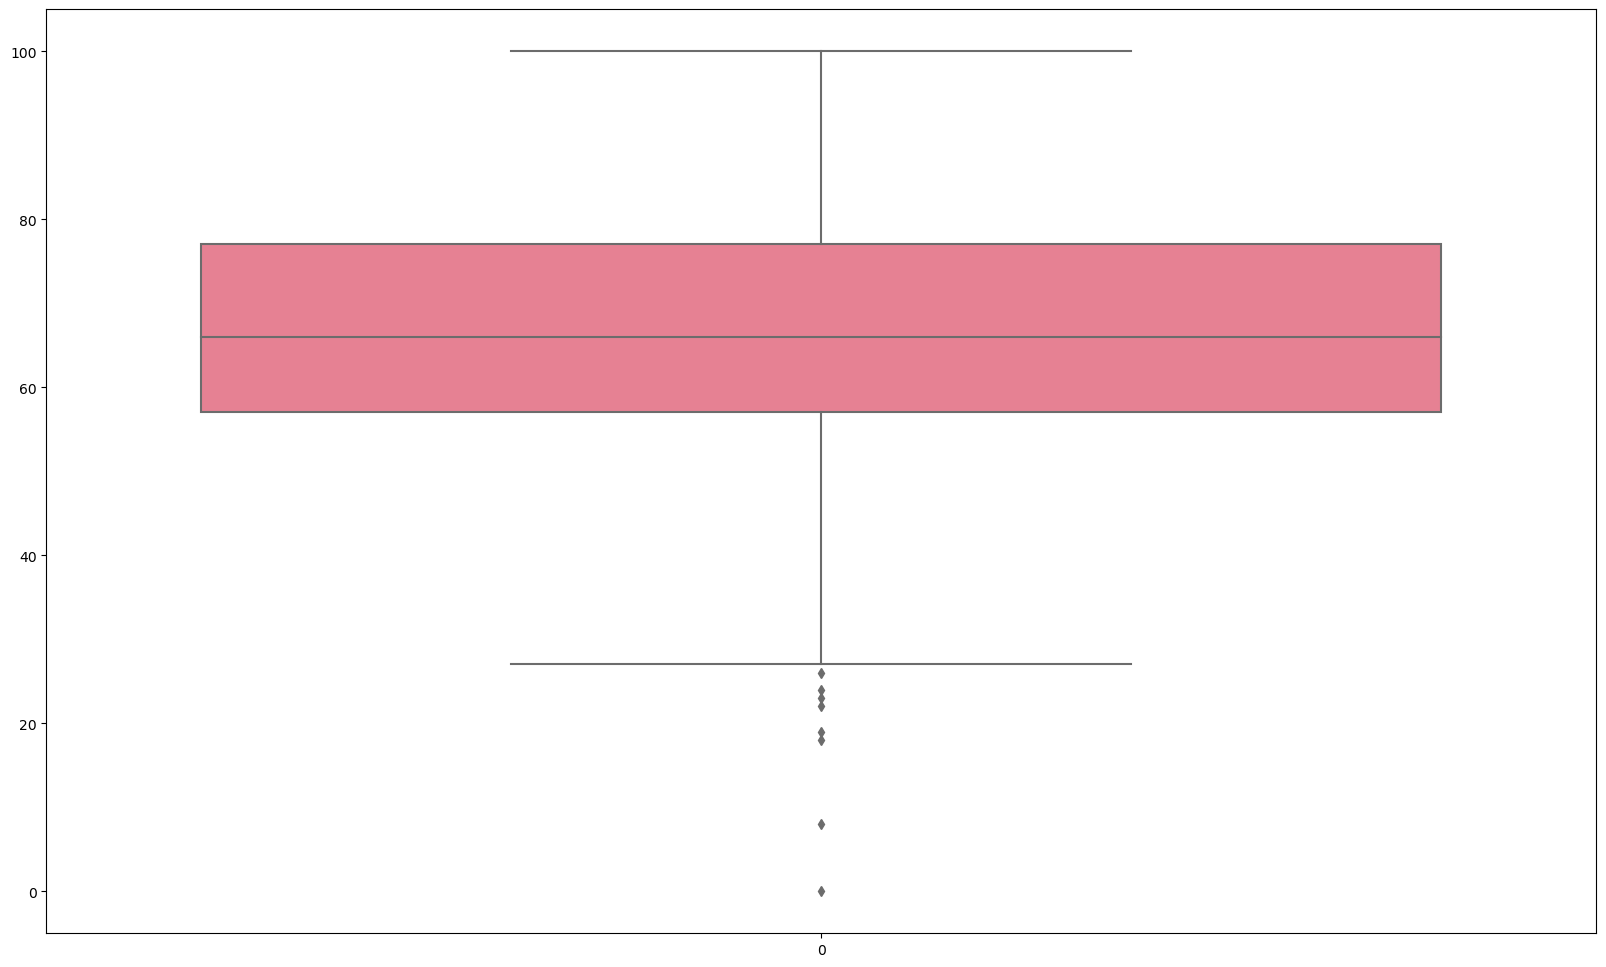

In [27]:
sns.boxplot(df['math score'])

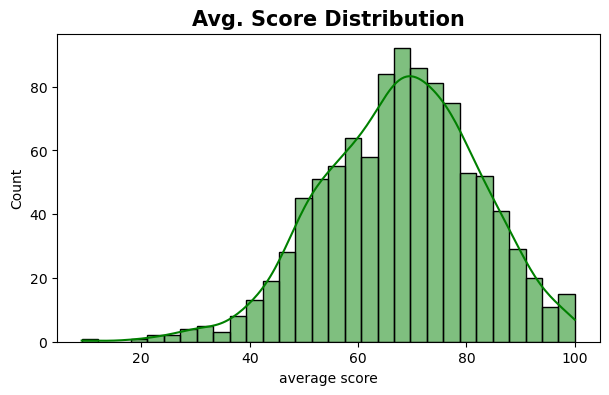

In [12]:
plt.figure(figsize=(7,4))
sns.set_palette('husl')
plt.title('Avg. Score Distribution', fontsize=15, fontweight='bold')
sns.histplot(data=df, x='average score',bins=30,kde=True,color='g')


plt.show()

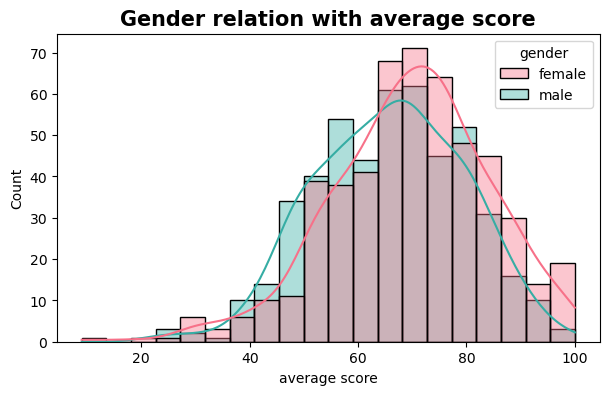

In [13]:
plt.figure(figsize=(7, 4))
sns.set_palette('husl',2)
plt.title('Gender relation with average score', fontsize=15, fontweight='bold', )


sns.histplot(data=df,x='average score',kde=True,hue='gender', bins=20, alpha=0.4)
plt.show()

In [17]:
gender_group = df.groupby('gender').mean()
gender_group

C:\Users\adars\AppData\Local\Temp\ipykernel_9172\3006147241.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gender_group = df.groupby('gender').mean()


,math score,reading score,writing score,average score
gender,,,,
female,63.624031,72.608108,72.467181,69.573643
male,68.728216,65.473029,63.311203,65.837483


In [28]:
df.rename(columns={"math score":"mathscore"},inplace=True)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mathscore,reading score,writing score,average score,grade
0,female,group B,bachelor's degree,standard,none,72.0,72,74,72.666667,B
1,female,group C,some college,standard,completed,69.0,90,88,82.333333,A
2,female,group B,master's degree,standard,none,90.0,95,93,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47.0,57,44,49.333333,E
4,male,group C,some college,standard,none,76.0,78,75,76.333333,B
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99,95,94.000000,A
996,male,group C,high school,free/reduced,none,62.0,55,55,57.333333,D
997,female,group C,high school,free/reduced,completed,59.0,71,65,65.000000,C
998,female,group D,some college,standard,completed,68.0,78,77,74.333333,B


In [32]:
q1=df.mathscore.quantile(0.25)
q3=df.mathscore.quantile(0.75)

q1,q3

(57.0, 77.0)

In [34]:
IQR=q3-q1
IQR

20.0

In [38]:
l_limit=q1-1.5*IQR
u_limit=q3+1.5*IQR
l_limit,u_limit

(27.0, 107.0)

In [37]:
df[(df.mathscore<l_limit)|(df.mathscore>u_limit)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mathscore,reading score,writing score,average score,grade
17,female,group B,some high school,free/reduced,none,18.0,32,28,26.000000,F
59,female,group C,some high school,free/reduced,none,0.0,17,10,9.000000,F
145,female,group C,some college,free/reduced,none,22.0,39,33,31.333333,F
338,female,group B,some high school,free/reduced,none,24.0,38,27,29.666667,F
466,female,group D,associate's degree,free/reduced,none,26.0,31,38,31.666667,F
787,female,group B,some college,standard,none,19.0,38,32,29.666667,F
842,female,group B,high school,free/reduced,completed,23.0,44,36,34.333333,E
980,female,group B,high school,free/reduced,none,8.0,24,23,18.333333,F


In [39]:
df.describe()

,mathscore,reading score,writing score,average score
count,998.000000,1000.000000,1000.000000,998.000000
mean,66.089178,69.169000,68.054000,67.769205
std,15.177686,14.600192,15.195657,14.269455
min,0.000000,17.000000,10.000000,9.000000
25%,57.000000,59.000000,57.750000,58.333333
50%,66.000000,70.000000,69.000000,68.333333
75%,77.000000,79.000000,79.000000,77.666667
max,100.000000,100.000000,100.000000,100.000000


In [42]:
df['Zscore']=(df.mathscore-df.mathscore.mean())/df.mathscore.std()
df


,gender,race/ethnicity,parental level of education,lunch,test preparation course,mathscore,reading score,writing score,average score,grade,Zscore
0,female,group B,bachelor's degree,standard,none,72.0,72,74,72.666667,B,0.389442
1,female,group C,some college,standard,completed,69.0,90,88,82.333333,A,0.191783
2,female,group B,master's degree,standard,none,90.0,95,93,92.666667,A,1.575393
3,male,group A,associate's degree,free/reduced,none,47.0,57,44,49.333333,E,-1.257713
4,male,group C,some college,standard,none,76.0,78,75,76.333333,B,0.652986
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99,95,94.000000,A,1.443621
996,male,group C,high school,free/reduced,none,62.0,55,55,57.333333,D,-0.269420
997,female,group C,high school,free/reduced,completed,59.0,71,65,65.000000,C,-0.467079
998,female,group D,some college,standard,completed,68.0,78,77,74.333333,B,0.125897
